In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import math
import json
from fnvhash import fnv1a_32
from numpy import dot
from numpy.linalg import norm

In [10]:
f=open('ast_result.txt','r')
raw_data = json.loads(f.read())
f.close()
hashed_data=[]
code_matrix1=[]
code_matrix2=[]
code_matrix=[]
index=[]
for i in range(1,21):
    hashed_element = []
    for j in range(len(raw_data[str(i)])):
        hashed_element.append(math.floor((fnv1a_32(bytes(raw_data[str(i)][j][0], encoding="ascii"))+fnv1a_32(bytes(raw_data[str(i)][j][1], encoding="ascii")))/100000))
    #if len(hashed_element)==752

    hashed_data.append(hashed_element)
    index.append(i)
min_length=min([len(i) for i in hashed_data])
for i in hashed_data:
    code_matrix.append(i[:min_length])
print(len(code_matrix))
"""
    if len(i)==min_length:
        print(len(i))
        code_matrix1.append(i)
    else:
        print(len(i))
        code_matrix2.append(i)
print(len(code_matrix1))
print(len(code_matrix2))
"""

20


'\n    if len(i)==min_length:\n        print(len(i))\n        code_matrix1.append(i)\n    else:\n        print(len(i))\n        code_matrix2.append(i)\nprint(len(code_matrix1))\nprint(len(code_matrix2))\n'

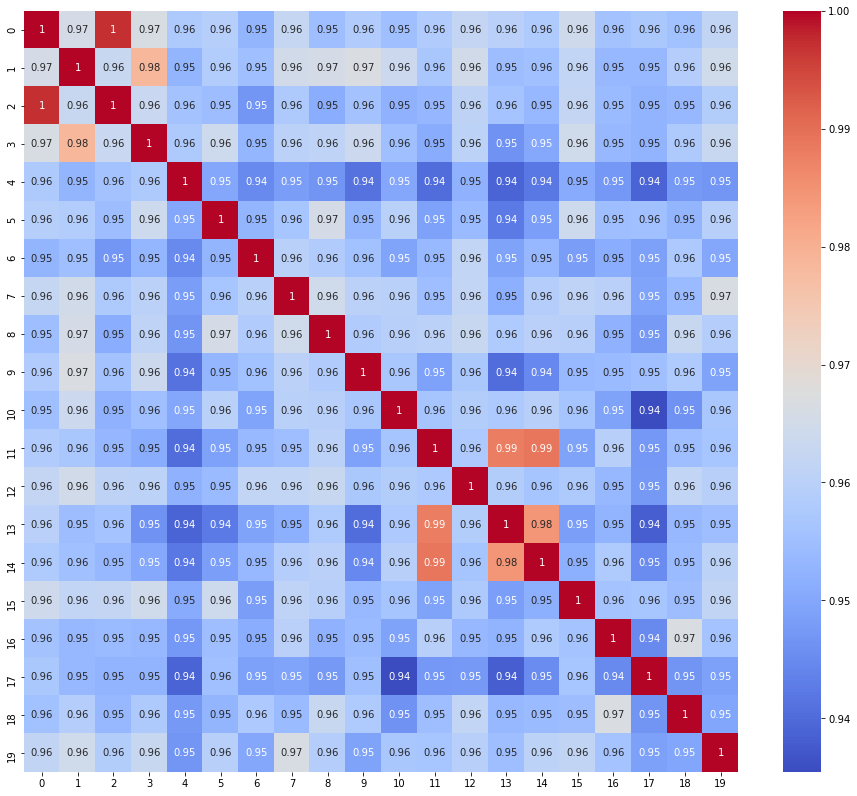

In [15]:
sim_matrix=[]
for i in range(len(code_matrix)):
    sim_list=[]
    for j in range(len(code_matrix)):
        sim_list.append(dot(code_matrix[i],code_matrix[j])/(norm(code_matrix[i])*norm(code_matrix[j])))
    sim_matrix.append(sim_list)
plt.figure(figsize=(16,14))
sns.heatmap(sim_matrix,cmap='coolwarm',annot=True)


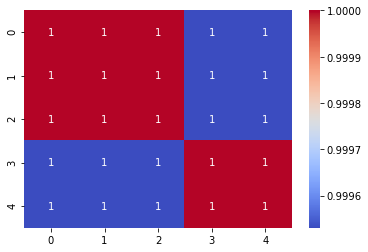

In [34]:
sim_matrix2=[]
for i in range(len(code_matrix2)):
    sim_list=[]
    for j in range(len(code_matrix2)):
        sim_list.append(dot(code_matrix2[i],code_matrix2[j])/(norm(code_matrix2[i])*norm(code_matrix2[j])))
    sim_matrix2.append(sim_list)
sns.heatmap(sim_matrix2,cmap='coolwarm',annot=True)